In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Data

In [69]:
df_train = pd.read_csv('source_data/train.csv')
df_songs = pd.read_csv('source_data/songs.csv')
df_song_extra_info = pd.read_csv('source_data/song_extra_info.csv')
df_members = pd.read_csv('source_data/members.csv')
df_artists = pd.read_csv('source_data/artists.csv')

# Train Data Type and Null Percentage Info

In [70]:
df_train

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
...,...,...,...,...,...,...
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1


In [71]:
df_train.describe(include='all')

,msno,song_id,source_system_tab,source_screen_name,source_type,target
count,7377418,7377418,7352569,6962614,7355879,7.377418e+06
unique,30755,359966,8,20,12,NaN
top,MXIMDXO0j3UpaT7FvOSGW6Y5zfhlh+xYjTqGoUdMzEE=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,my library,Local playlist more,local-library,NaN
freq,5819,13973,3684730,3228202,2261399,NaN
mean,NaN,NaN,NaN,NaN,NaN,5.035171e-01
std,NaN,NaN,NaN,NaN,NaN,4.999877e-01
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,1.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,1.000000e+00


In [72]:
source_system_tabs = df_train['source_system_tab'].unique()
print("Number of unique source system tabs:", len(source_system_tabs))
print(source_system_tabs)


Number of unique source system tabs: 9
['explore' 'my library' 'search' 'discover' nan 'radio' 'listen with'
 'notification' 'settings']


In [73]:
source_screen_names = df_train['source_screen_name'].unique()
print("Number of unique source screen names:", len(source_screen_names))
print(source_screen_names)


Number of unique source screen names: 21
['Explore' 'Local playlist more' nan 'My library' 'Online playlist more'
 'Album more' 'Discover Feature' 'Unknown' 'Discover Chart' 'Radio'
 'Artist more' 'Search' 'Others profile more' 'Search Trends'
 'Discover Genre' 'My library_Search' 'Search Home' 'Discover New'
 'Self profile more' 'Concert' 'Payment']


In [74]:
source_types = df_train['source_type'].unique()
print("Number of unique source types:", len(source_types))
print(source_types)

Number of unique source types: 13
['online-playlist' 'local-playlist' 'local-library' 'top-hits-for-artist'
 'album' nan 'song-based-playlist' 'radio' 'song' 'listen-with' 'artist'
 'topic-article-playlist' 'my-daily-playlist']


In [75]:
targets = df_train['target'].unique()
print("Number of unique targets:", len(targets))
print(targets)

Number of unique targets: 2
[1 0]


In [76]:
# missing values
df_train.isnull().sum() / len(df_train) * 100

msno                  0.000000
song_id               0.000000
source_system_tab     0.336825
source_screen_name    5.622618
source_type           0.291959
target                0.000000
dtype: float64

# Member Data Type and Null Percentage

In [77]:
df_members = df_members[df_members['msno'].isin(df_train['msno'].unique())]
df_members


,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
...,...,...,...,...,...,...,...
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920


In [78]:
df_members.describe(include='all')

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
count,30755,30755.000000,30755.000000,13663,30755.000000,3.075500e+04,3.075500e+04
unique,30755,NaN,NaN,2,NaN,NaN,NaN
top,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,NaN,NaN,male,NaN,NaN,NaN
freq,1,NaN,NaN,7004,NaN,NaN,NaN
mean,NaN,5.648025,12.973143,NaN,6.084409,2.013772e+07,2.016910e+07
std,NaN,6.337392,18.550983,NaN,2.295898,2.956010e+04,7.195062e+03
min,NaN,1.000000,-43.000000,NaN,3.000000,2.004033e+07,1.970010e+07
25%,NaN,1.000000,0.000000,NaN,4.000000,2.012062e+07,2.017013e+07
50%,NaN,1.000000,0.000000,NaN,7.000000,2.015061e+07,2.017091e+07
75%,NaN,12.000000,26.000000,NaN,9.000000,2.016091e+07,2.017093e+07


In [79]:
member_cities = df_members['city'].unique()
print("Number of unique member cities:", len(member_cities))
print(member_cities)

Number of unique member cities: 21
[ 1 13 12 15  5  6 11 18  4 22 14  8 20  3 17 10 16  9 21  7 19]


In [80]:
member_age = df_members['bd'].unique()
print("Number of unique member ages:", len(member_age))
print(member_age)

Number of unique member ages: 92
[   0   43   28   33   20   29   26   21   22   23   37   18   19   51
   24   17   45   36   57   25   27   34   32   48   54   47   35   30
   46   31   14   41   59    2   40   38   16   55   39   73   49   44
  103   52   50   70   42   65   56   58   53   15   64   63   76   66
    3   72   67   62   61  105   60   13   90   12   68  131   74   89
  931  -38  144   85  112   11  102   83 1051   87    7   95  -43  111
   93    5   78 1030  106  107   82   10]


In [81]:
member_genders = df_members['gender'].unique()
print("Number of unique member genders:", len(member_genders))
print(member_genders)


Number of unique member genders: 3
[nan 'female' 'male']


In [82]:
member_registered_via = df_members['registered_via'].unique()
print("Number of unique registered via:", len(member_registered_via))
print(member_registered_via)

Number of unique registered via: 5
[ 7  4  9  3 13]


In [83]:
registration_dates = df_members['registration_init_time'].unique()
print("Number of unique registration dates:", len(registration_dates))
print(sorted(registration_dates))

Number of unique registration dates: 3811
[np.int64(20040326), np.int64(20040327), np.int64(20040328), np.int64(20040329), np.int64(20040330), np.int64(20040331), np.int64(20040401), np.int64(20040402), np.int64(20040403), np.int64(20040404), np.int64(20040405), np.int64(20040406), np.int64(20040408), np.int64(20040410), np.int64(20040414), np.int64(20040419), np.int64(20040421), np.int64(20040423), np.int64(20040503), np.int64(20040504), np.int64(20040506), np.int64(20040516), np.int64(20040602), np.int64(20040604), np.int64(20040605), np.int64(20040610), np.int64(20040618), np.int64(20040619), np.int64(20040622), np.int64(20040624), np.int64(20040625), np.int64(20040626), np.int64(20040629), np.int64(20040701), np.int64(20040705), np.int64(20040707), np.int64(20040709), np.int64(20040710), np.int64(20040712), np.int64(20040714), np.int64(20040715), np.int64(20040716), np.int64(20040717), np.int64(20040718), np.int64(20040719), np.int64(20040720), np.int64(20040721), np.int64(20040723

In [84]:
expiration_dates = df_members['expiration_date'].unique()
print("Number of unique expiration dates:", len(expiration_dates))
print(sorted(expiration_dates))


Number of unique expiration dates: 1395
[np.int64(19700101), np.int64(20041015), np.int64(20041016), np.int64(20041020), np.int64(20050610), np.int64(20051019), np.int64(20051101), np.int64(20051210), np.int64(20060709), np.int64(20060903), np.int64(20061205), np.int64(20061214), np.int64(20061217), np.int64(20070514), np.int64(20070710), np.int64(20070712), np.int64(20070816), np.int64(20071006), np.int64(20071012), np.int64(20080215), np.int64(20080305), np.int64(20080312), np.int64(20080422), np.int64(20080519), np.int64(20080615), np.int64(20080717), np.int64(20081011), np.int64(20081231), np.int64(20090625), np.int64(20090820), np.int64(20091002), np.int64(20100105), np.int64(20100210), np.int64(20100722), np.int64(20100808), np.int64(20110207), np.int64(20110219), np.int64(20110307), np.int64(20110314), np.int64(20110316), np.int64(20110327), np.int64(20110330), np.int64(20110502), np.int64(20110523), np.int64(20110524), np.int64(20110803), np.int64(20110817), np.int64(20110922),

In [85]:
df_members.isnull().sum() / len(df_members) * 100

msno                       0.000000
city                       0.000000
bd                         0.000000
gender                    55.574703
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64

# Songs Data Type and Null Percentage

In [86]:
df_songs = df_songs[df_songs['song_id'].isin(df_train['song_id'].unique())]
df_songs

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
...,...,...,...,...,...,...,...
2296048,UzwJe62Lpb9wW6/I1tsu967cx3kcRl7pwkp4TmxnOew=,156410,958,Klaus Thunemann,NaN,NaN,-1.0
2296161,cf+3RAbsfu7v0rRVAXc+1BdbxnR0FqACRr9Cnn3nm+c=,310308,1609,Internet Famous,NaN,NaN,52.0
2296187,Yk0z6TW+APnYkIkBR5D9wUDQjOyzpdAFsN81F49FCyc=,218618,465,Luckys Musicbox Online,Sahm,NaN,52.0
2296259,QLPe0TmxFtDC3NmTep3GZE9Ewmw2Yevv/UkLo/Zt6DA=,360176,1609,Sammy Porter feat. Grace Fleary,NaN,NaN,52.0


In [87]:
df_songs.describe(include='all')

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
count,359914,3.599140e+05,352681,359914,204412,91196,359913.000000
unique,359914,NaN,572,40582,76064,33887,NaN
top,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,NaN,465,Various Artists,Neuromancer,林夕,NaN
freq,1,NaN,136310,17080,2026,508,NaN
mean,NaN,2.484194e+05,NaN,NaN,NaN,NaN,27.519787
std,NaN,1.466990e+05,NaN,NaN,NaN,NaN,23.511959
min,NaN,1.393000e+03,NaN,NaN,NaN,NaN,-1.000000
25%,NaN,1.982170e+05,NaN,NaN,NaN,NaN,3.000000
50%,NaN,2.337320e+05,NaN,NaN,NaN,NaN,24.000000
75%,NaN,2.747465e+05,NaN,NaN,NaN,NaN,52.000000


In [88]:
song_lengths = df_songs['song_length'].unique()
print("Number of unique song lengths:", len(song_lengths))
print(song_lengths)


Number of unique song lengths: 60266
[247640 197328 231781 ... 120121 657170 302238]


In [89]:
genre_distribution = df_songs['genre_ids'].astype(str).str.split('|').explode().value_counts()
genre_distribution

genre_ids
465     141989
1609     25217
2022     21805
958      17866
921      16303
         ...  
2150         1
2192         1
338          1
2183         1
779          1
Name: count, Length: 167, dtype: int64

In [90]:
composer_distribution = df_songs['composer'].astype(str).str.split('|').explode().value_counts()
composer_distribution
# len(df_songs['composer'].unique())

composer
nan                        155502
Neuromancer                  2029
佚名                           1764
Johann Sebastian Bach        1208
Wolfgang Amadeus Mozart      1178
                            ...  
Stephen Massa                   1
 渡辺 俊幸                          1
 Diakar                         1
 Sidney Hamadi                  1
Sahm                            1
Name: count, Length: 94606, dtype: int64

In [91]:
lyricist_distribution = df_songs['lyricist'].astype(str).str.split('|').explode().value_counts()
lyricist_distribution
# len(df_songs['lyricist'].unique())


lyricist
nan                   268718
林夕                       513
李岩修                      450
姚若龍                      435
方文山                      325
                       ...  
Fukazu                     1
 Joo Hee                   1
汪穎                         1
BY2 / 孔令奇                  1
 ADELE LAURIE BLUE         1
Name: count, Length: 42896, dtype: int64

In [92]:
song_languages = df_songs['language'].unique()
print("Number of unique song languages:", len(song_languages))
print(song_languages)

Number of unique song languages: 11
[ 3. 31. 52. 17. 10. -1. 24. 45. 59. 38. nan]


In [93]:
print((df_songs.isnull().sum() / len(df_songs) * 100).apply(lambda x: f"{x:.6f}"))

song_id         0.000000
song_length     0.000000
genre_ids       2.009647
artist_name     0.000000
composer       43.205321
lyricist       74.661725
language        0.000278
dtype: object


# Song Extra Info Data Types and Null Percentage

In [94]:
df_song_extra_info = df_song_extra_info[df_song_extra_info['song_id'].isin(df_train['song_id'].unique())]
df_song_extra_info

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001
...,...,...,...
2295682,ovAomsZeNG2R/bdvz+VG7jS2dsl/ICDGigRNk9ZcDPA=,Party Rock Anthem,CAM461101133
2295690,BlT348po6FlBzRgrkbUiFHcHUIiMZLrfAETS026pOqI=,Dangerous,USX650810053
2295824,4ieLI5OTN5A8e1LP8ws86JIO9Eeq5Qyj6okvTOdlyCU=,Tutti Scemi,ITDF61599909
2295894,k+5dCPmcv70VkwVE7RLnlW2Jy1S8rOdWye7B1YSvmjM=,Black of Black,FRX201616757


In [95]:
df_song_extra_info.describe(include='all')

,song_id,name,isrc
count,359807,359806,311628
unique,359807,234144,269760
top,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,Intro,GBPS81500031
freq,1,215,25


In [96]:
df_song_extra_info.isnull().sum() / len(df_song_extra_info)  * 100

song_id     0.000000
name        0.000278
isrc       13.390234
dtype: float64

# Artists Data Type and Null Percentage

In [97]:
df_artists

,artist_name,gender,country
0,張信哲 (Jeff Chang),Male,TW
1,BLACKPINK,NaN,KR
2,SUPER JUNIOR,NaN,KR
3,S.H.E,NaN,TW
4,貴族精選,Male,JP
...,...,...,...
40577,Clive Williams| Malcolm Hughes,Male,US
40578,Gintonic,NaN,NaN
40579,Soundtrip Argentina,NaN,NaN
40580,反賄選廣播劇,Male,JP


In [98]:
df_artists.describe(include='all')

,artist_name,gender,country
count,40582,20863,32758
unique,40582,5,141
top,張信哲 (Jeff Chang),Male,US
freq,1,14094,10611


In [99]:
artist_gender_distribution = df_artists['gender'].value_counts()
artist_gender_distribution

gender
Male              14094
Female             6222
Not applicable      495
Non-binary           41
Other                11
Name: count, dtype: int64

In [100]:
artist_gender_distribution = df_artists['gender'].unique()
print("Number of unique artist genders:", len(artist_gender_distribution))
print(artist_gender_distribution)

Number of unique artist genders: 6
['Male' nan 'Female' 'Not applicable' 'Non-binary' 'Other']


In [101]:
artist_country = df_artists['country'].unique()
print("Number of unique artist countries:", len(artist_country))
print(artist_country)

artist_country_distribution = df_artists['country'].value_counts()
print("\nCount of artist countries")
print(artist_country_distribution)


Number of unique artist countries: 142
['TW' 'KR' 'JP' 'MY' 'SG' 'IE' nan 'GB' 'US' 'HK' 'CA' 'NZ' 'CN' 'NL' 'NO'
 'DE' 'FR' 'XW' 'SE' 'AU' 'SN' 'JM' 'HU' 'IT' 'BR' 'RO' 'FI' 'CH' 'ES'
 'AT' 'AR' 'DK' 'IN' 'CZ' 'UA' 'CU' 'IS' 'SU' 'RU' 'MN' 'MX' 'PH' 'PL'
 'HR' 'GR' 'MD' 'CO' 'BE' 'LV' 'SI' 'PR' 'BG' 'ZA' 'BY' 'EE' 'PK' 'CL'
 'ML' 'ID' 'VG' 'IL' 'CD' 'LT' 'PT' 'BB' 'TH' 'GM' 'XK' 'BS' 'MT' 'NG'
 'TR' 'UY' 'VN' 'EG' 'RS' 'SK' 'BA' 'XG' 'KP' 'AM' 'GE' 'FO' 'BJ' 'GD'
 'CI' 'BM' 'TT' 'MC' 'LU' 'TZ' 'KZ' 'MO' 'TN' 'GT' 'VC' 'PA' 'BF' 'RE'
 'XE' 'VE' 'ZM' 'LA' 'AE' 'XC' 'CV' 'AW' 'AL' 'BD' 'MG' 'ZW' 'LB' 'DO'
 'HT' 'SB' 'HN' 'IR' 'NC' 'EC' 'DZ' 'KE' 'GL' 'MA' 'AZ' 'MK' 'CY' 'LK'
 'GF' 'CM' 'JO' 'GA' 'YU' 'JE' 'VI' 'GI' 'UG' 'GH' 'PE' 'LI' 'BO' 'SA'
 'GN']

Count of artist countries
country
US    10611
GB     3955
JP     3773
DE     1575
TW     1168
      ...  
BF        1
XK        1
MN        1
VG        1
GN        1
Name: count, Length: 141, dtype: int64


In [102]:
df_artists.isnull().sum() / len(df_artists)

artist_name    0.000000
gender         0.485905
country        0.192795
dtype: float64

# It's PLOTTING TIME

## Basic Distrbutions

### Member Distribution

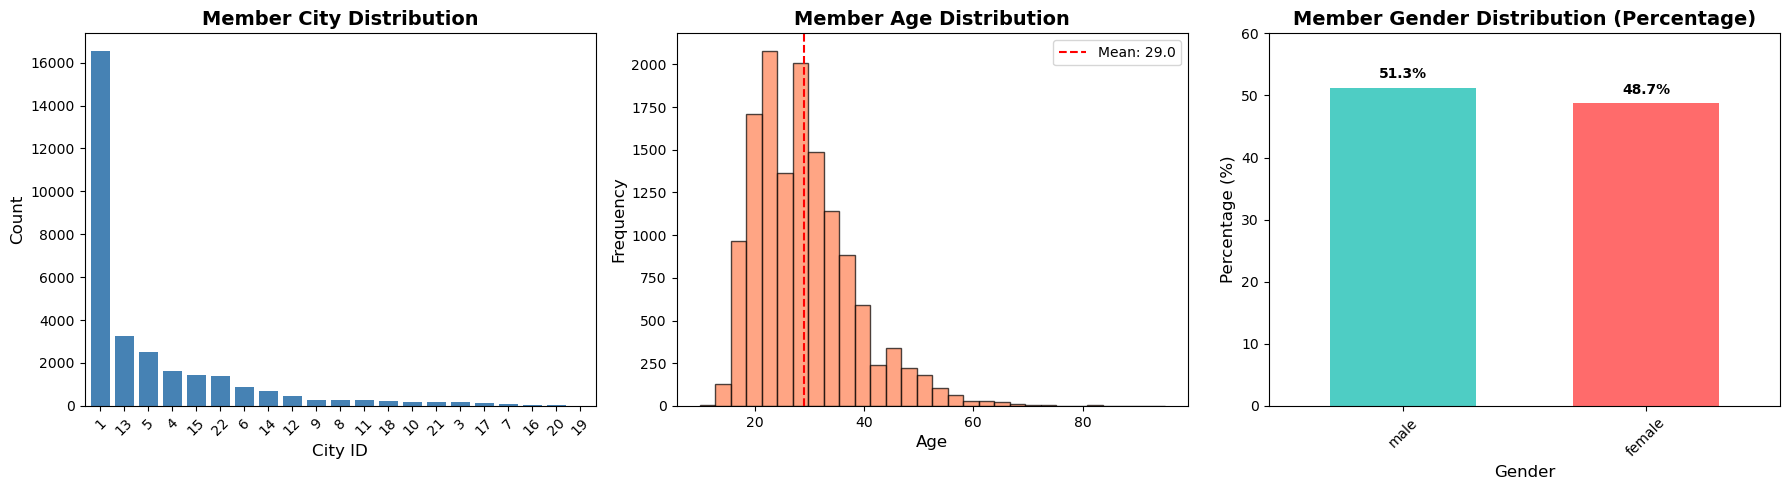

In [122]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# member city
city_counts = df_members['city'].value_counts().sort_values(ascending=False)
city_counts.plot(kind='bar', ax=axes[0], color='steelblue', width=0.8)
axes[0].set_title('Member City Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('City ID', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# member age
df_members_age = df_members[(df_members['bd'] >= 10) & (df_members['bd'] <= 100)]['bd']
axes[1].hist(df_members_age, bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_title('Member Age Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Age', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].axvline(df_members_age.mean(), color='red', linestyle='--', 
                label=f'Mean: {df_members_age.mean():.1f}')
axes[1].legend()

# member gender
gender_counts = df_members['gender'].value_counts()
gender_pct = (gender_counts / gender_counts.sum() * 100)

colors = ['#4ECDC4', '#FF6B6B', '#95E1D3']
gender_pct.plot(kind='bar', ax=axes[2], color=colors[:len(gender_pct)], width=0.6)
axes[2].set_title('Member Gender Distribution (Percentage)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Gender', fontsize=12)
axes[2].set_ylabel('Percentage (%)', fontsize=12)
axes[2].set_ylim(0, 60)
axes[2].tick_params(axis='x', rotation=45)

# Add percentage labels on bars
for i, (gender, pct) in enumerate(gender_pct.items()):
    axes[2].text(i, pct + 1, f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### Song Distributions

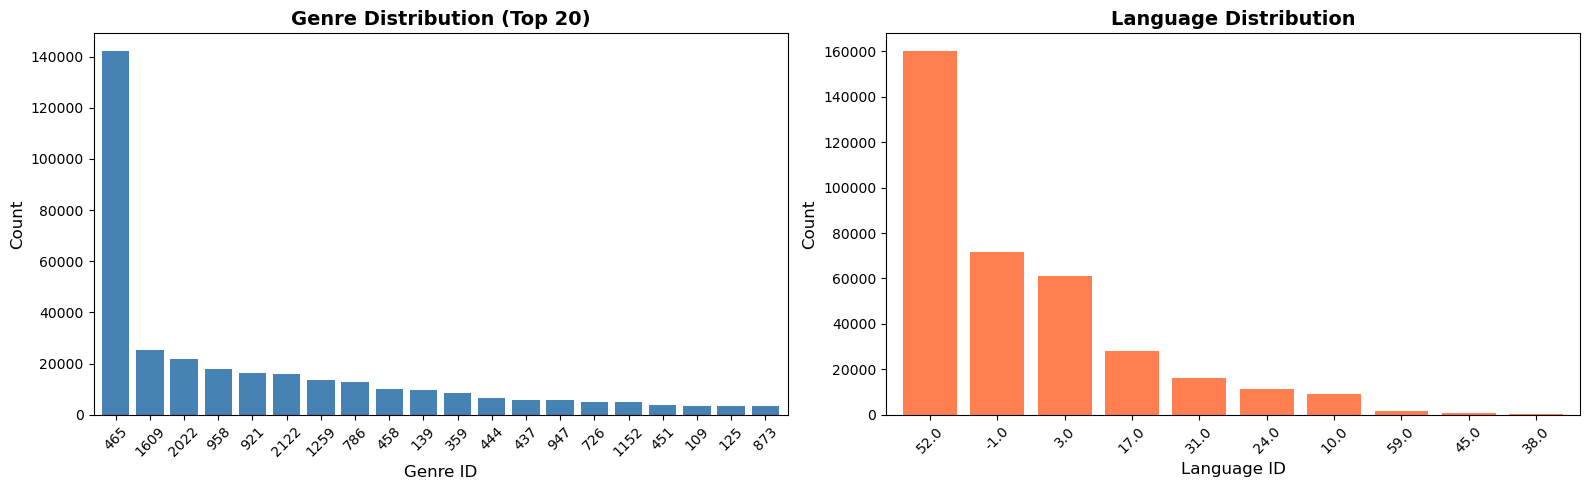

In [105]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# genre distribution
df_genres = df_songs[['genre_ids']].dropna().copy()
df_genres['genre_ids'] = df_genres['genre_ids'].astype(str)
df_genres_exploded = df_genres.assign(
    genre_id=df_genres['genre_ids'].str.split('|')
).explode('genre_id')

genre_counts = df_genres_exploded['genre_id'].value_counts().head(20).sort_values(ascending=False)
genre_counts.plot(kind='bar', ax=axes[0], color='steelblue', width=0.8)
axes[0].set_title('Genre Distribution (Top 20)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Genre ID', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# language distribution
language_counts = df_songs['language'].value_counts().sort_index().sort_values(ascending=False)
language_counts.plot(kind='bar', ax=axes[1], color='coral', width=0.8)
axes[1].set_title('Language Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Language ID', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Artist Distribution

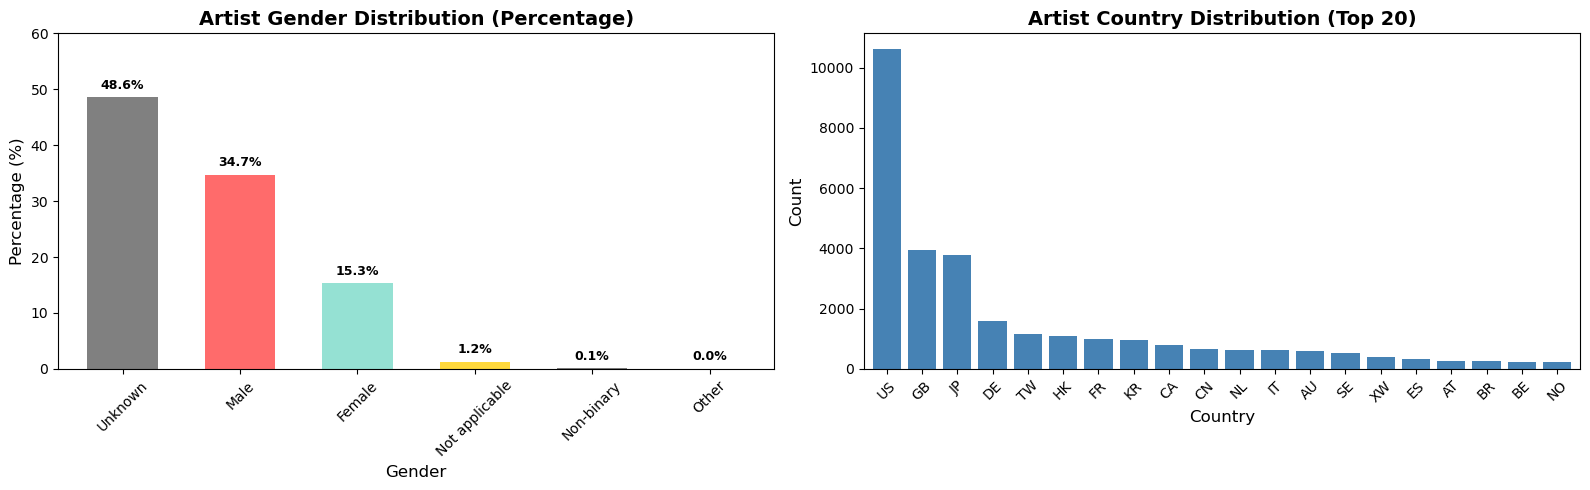

In [106]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# gender distribution
gender_counts = df_artists['gender'].value_counts(dropna=False)
gender_pct = (gender_counts / gender_counts.sum() * 100).sort_values(ascending=False)

gender_pct_display = gender_pct.copy()
if pd.isna(gender_pct_display.index).any():
    gender_pct_display.index = gender_pct_display.index.fillna('Unknown')

gender_pct_display.plot(kind='bar', ax=axes[0], color=['#808080', '#FF6B6B', '#95E1D3', '#FFD93D'], width=0.6)
axes[0].set_title('Artist Gender Distribution (Percentage)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Gender', fontsize=12)
axes[0].set_ylabel('Percentage (%)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0, 60)

# Add percentage labels on bars
for i, (gender, pct) in enumerate(gender_pct_display.items()):
    axes[0].text(i, pct + 1, f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)


# country distribution
country_counts = df_artists['country'].value_counts().head(20).sort_values(ascending=False)
country_counts.plot(kind='bar', ax=axes[1], color='steelblue', width=0.8)
axes[1].set_title('Artist Country Distribution (Top 20)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Country', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Artist Gender vs Member Gender Correlation

In [107]:
# please excuse this disgusting merge

df_merged = df_train[['msno', 'song_id']].merge(
    df_songs[['song_id', 'artist_name']], 
    on='song_id', 
    how='inner'
).merge(
    df_artists[['artist_name', 'gender']].rename(columns={'gender': 'artist_gender'}),
    on='artist_name',
    how='left'
).merge(
    df_members[['msno', 'gender']].rename(columns={'gender': 'member_gender'}),
    on='msno',
    how='inner'
)

# filter to only male/female for both
df_gender_corr = df_merged[
    (df_merged['member_gender'].isin(['male', 'female'])) & 
    (df_merged['artist_gender'].isin(['Male', 'Female']))
].copy()

df_gender_corr['artist_gender'] = df_gender_corr['artist_gender'].str.lower()


In [123]:
# get crosstab pct
gender_crosstab = pd.crosstab(
    df_gender_corr['member_gender'], 
    df_gender_corr['artist_gender'], 
    normalize='index'
) * 100

# chi square for science
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_gender_corr['member_gender'], df_gender_corr['artist_gender'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f"\nChi-square test:")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.6f}")


Chi-square test:
Chi-square statistic: 5275.8148
P-value: 0.000000


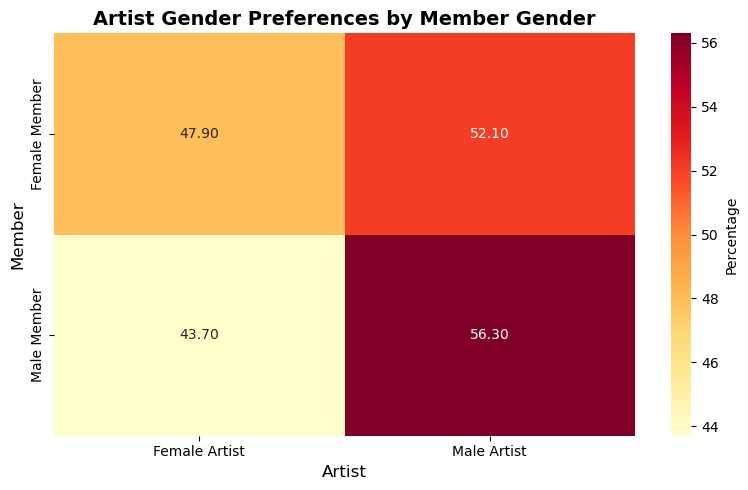

In [109]:
fig, axes = plt.subplots(figsize=(8, 5))

sns.heatmap(gender_crosstab, annot=True, fmt='.2f', cmap='YlOrRd', 
            cbar_kws={'label': 'Percentage'}, ax=axes, 
            xticklabels=['Female Artist', 'Male Artist'],
            yticklabels=['Female Member', 'Male Member'])
axes.set_title('Artist Gender Preferences by Member Gender', 
                  fontsize=14, fontweight='bold')
axes.set_xlabel('Artist', fontsize=12)
axes.set_ylabel('Member', fontsize=12)

plt.tight_layout()
plt.show()


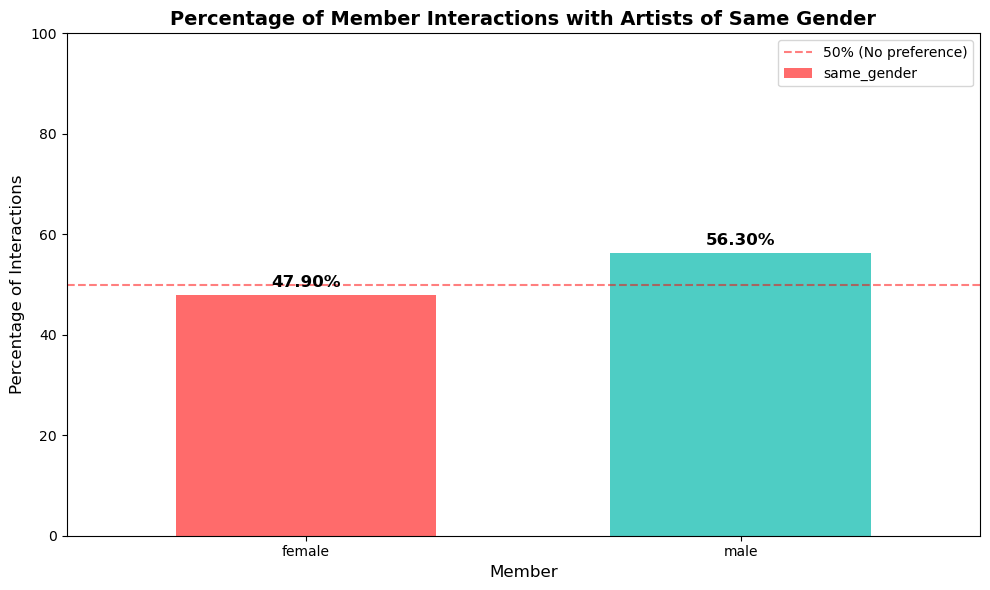

In [110]:
# same gender preference
# i think we should report this plot in the paper

df_gender_corr['same_gender'] = (df_gender_corr['member_gender'] == df_gender_corr['artist_gender'])

fig, ax = plt.subplots(figsize=(10, 6))
same_gender_pct = df_gender_corr.groupby('member_gender')['same_gender'].mean() * 100
same_gender_pct.plot(kind='bar', ax=ax, color=['#FF6B6B', '#4ECDC4'], width=0.6)
ax.axhline(y=50, color='red', linestyle='--', alpha=0.5, label='50% (No preference)')
ax.set_title('Percentage of Member Interactions with Artists of Same Gender', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Member', fontsize=12)
ax.set_ylabel('Percentage of Interactions', fontsize=12)
ax.set_ylim(0, 100)
ax.legend()
ax.tick_params(axis='x', rotation=0)

# Add value labels on bars
for i, v in enumerate(same_gender_pct):
    ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontweight='bold', size=12)

plt.tight_layout()
plt.show()


## Genre vs member gender

Looks like genre preference is similar across genders

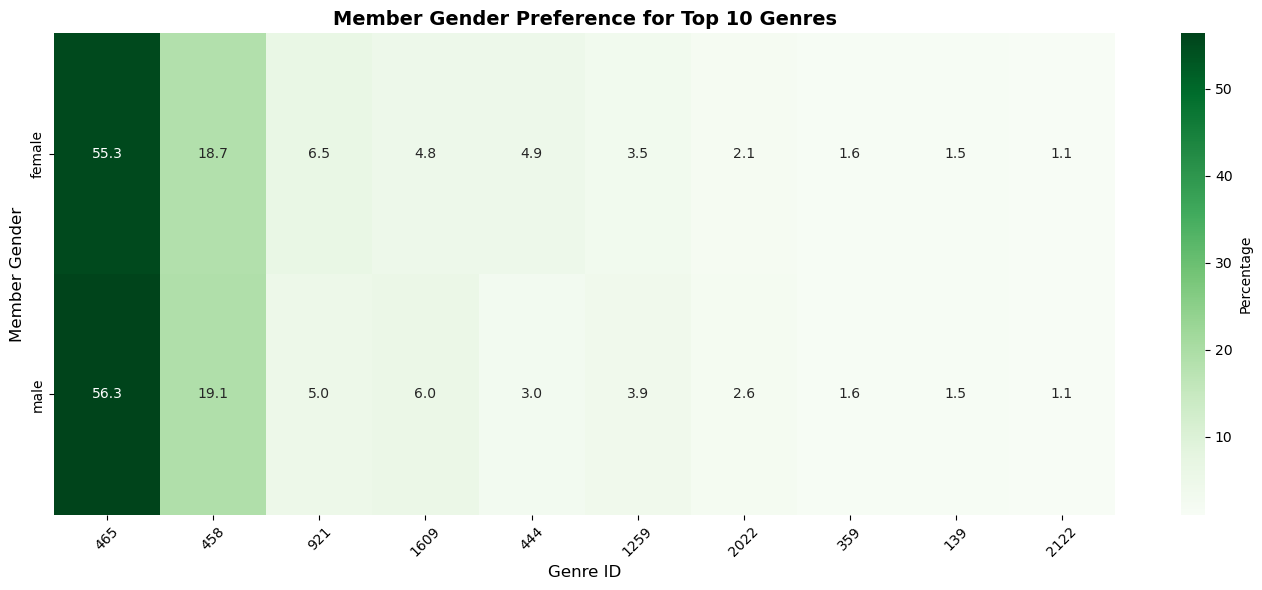

In [111]:
df_genre_gender = df_train[['msno', 'song_id']].merge(
    df_songs[['song_id', 'genre_ids']],
    on='song_id',
    how='inner'
).merge(
    df_members[['msno', 'gender']].rename(columns={'gender': 'member_gender'}),
    on='msno',
    how='inner'
)

df_genre_gender = df_genre_gender.dropna(subset=['genre_ids', 'member_gender']).copy()

# split genre_ids
df_genre_gender['genre_ids'] = df_genre_gender['genre_ids'].astype(str)
df_genre_exploded = df_genre_gender.assign(
    genre_id=df_genre_gender['genre_ids'].str.split('|')
).explode('genre_id')

# top 10 genres
top_genres = df_genre_exploded['genre_id'].value_counts().head(10).index
df_genre_top = df_genre_exploded[df_genre_exploded['genre_id'].isin(top_genres)].copy()

genre_crosstab = pd.crosstab(
    df_genre_top['member_gender'],
    df_genre_top['genre_id'],
    normalize='index'
) * 100

genre_crosstab = genre_crosstab[top_genres]

fig, ax = plt.subplots(figsize=(14, 6))

sns.heatmap(genre_crosstab, annot=True, fmt='.1f', cmap='Greens', 
            cbar_kws={'label': 'Percentage'}, ax=ax)
ax.set_title('Member Gender Preference for Top 10 Genres', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Genre ID', fontsize=12)
ax.set_ylabel('Member Gender', fontsize=12)
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



### Song length vs member gender


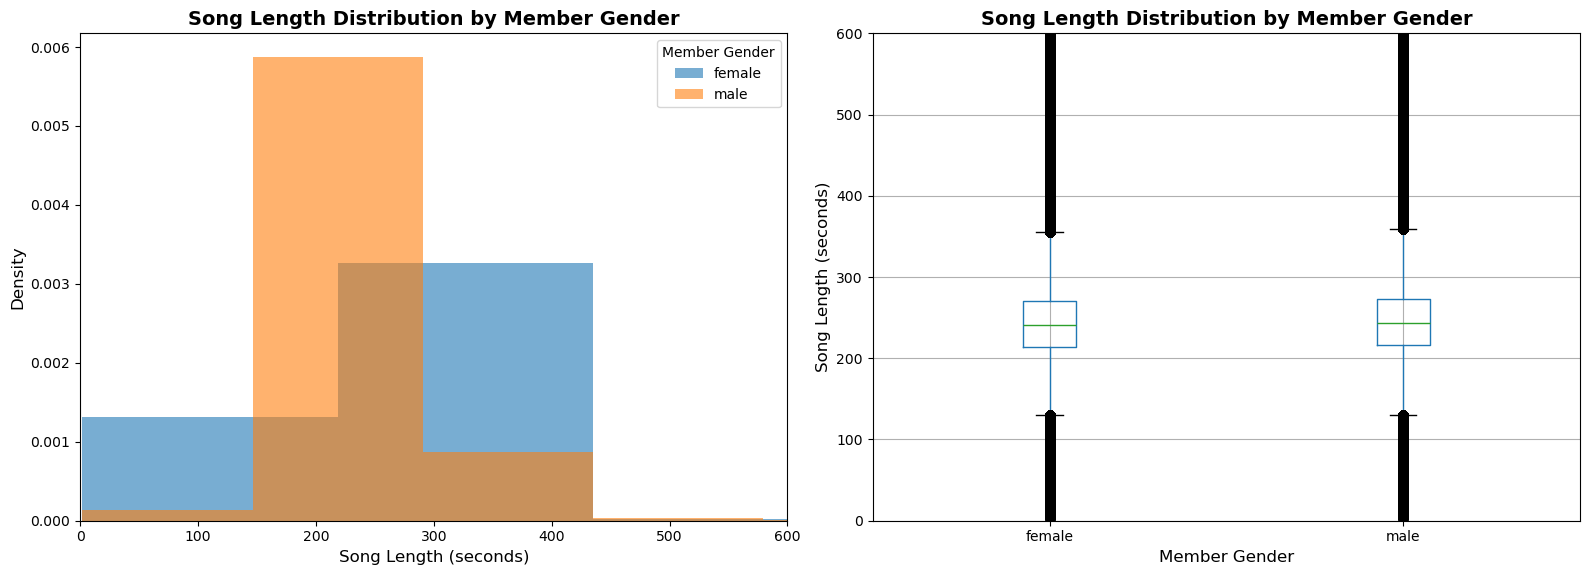

In [112]:
# Boxplot not too different but the distribution is different. Female members listens to longer songs more often?

df_length_gender = df_train[['msno', 'song_id']].merge(
    df_songs[['song_id', 'song_length']],
    on='song_id',
    how='inner'
).merge(
    df_members[['msno', 'gender']].rename(columns={'gender': 'member_gender'}),
    on='msno',
    how='inner'
)

df_length_gender = df_length_gender.dropna(subset=['song_length', 'member_gender']).copy()
df_length_gender['song_length_sec'] = df_length_gender['song_length'] / 1000

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for gender in df_length_gender['member_gender'].unique():
    data = df_length_gender[df_length_gender['member_gender'] == gender]['song_length_sec']
    axes[0].hist(data, bins=50, alpha=0.6, label=gender, density=True)

axes[0].set_title('Song Length Distribution by Member Gender', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Song Length (seconds)', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].legend(title='Member Gender')
axes[0].set_xlim(0, 600)

df_length_gender.boxplot(column='song_length_sec', by='member_gender', ax=axes[1])
axes[1].set_title('Song Length Distribution by Member Gender', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Member Gender', fontsize=12)
axes[1].set_ylabel('Song Length (seconds)', fontsize=12)
axes[1].set_ylim(0, 600)

plt.suptitle('')
plt.tight_layout()
plt.show()

### How often are composer and lyricist the same person?


In [113]:
# kinda intersting?

df_comp_lyr = df_songs[['composer', 'lyricist']].copy()

def check_same_person(row):
    comp = str(row['composer']).lower() if pd.notna(row['composer']) else ''
    lyr = str(row['lyricist']).lower() if pd.notna(row['lyricist']) else ''
    
    if comp == '' or lyr == '':
        return 'Missing'
    
    # Split by common separators
    comp_list = [c.strip() for c in comp.replace('|', ',').split(',') if c.strip()]
    lyr_list = [l.strip() for l in lyr.replace('|', ',').split(',') if l.strip()]
    
    if any(c in lyr_list for c in comp_list) or any(l in comp_list for l in lyr_list):
        return 'Same'
    return 'Different'

df_comp_lyr['same_person'] = df_comp_lyr.apply(check_same_person, axis=1)

same_person_stats = df_comp_lyr['same_person'].value_counts(normalize=True) * 100
print("\nComposer-Lyricist Relationship:")
print(same_person_stats)




Composer-Lyricist Relationship:
same_person
Missing      75.047928
Same         14.615158
Different    10.336914
Name: proportion, dtype: float64


### Age vs gender 



Age Statistics by Gender:
             mean  median       std  count
gender                                    
female  29.045518    27.0  9.036036   6415
male    28.861649    27.0  9.166292   6816


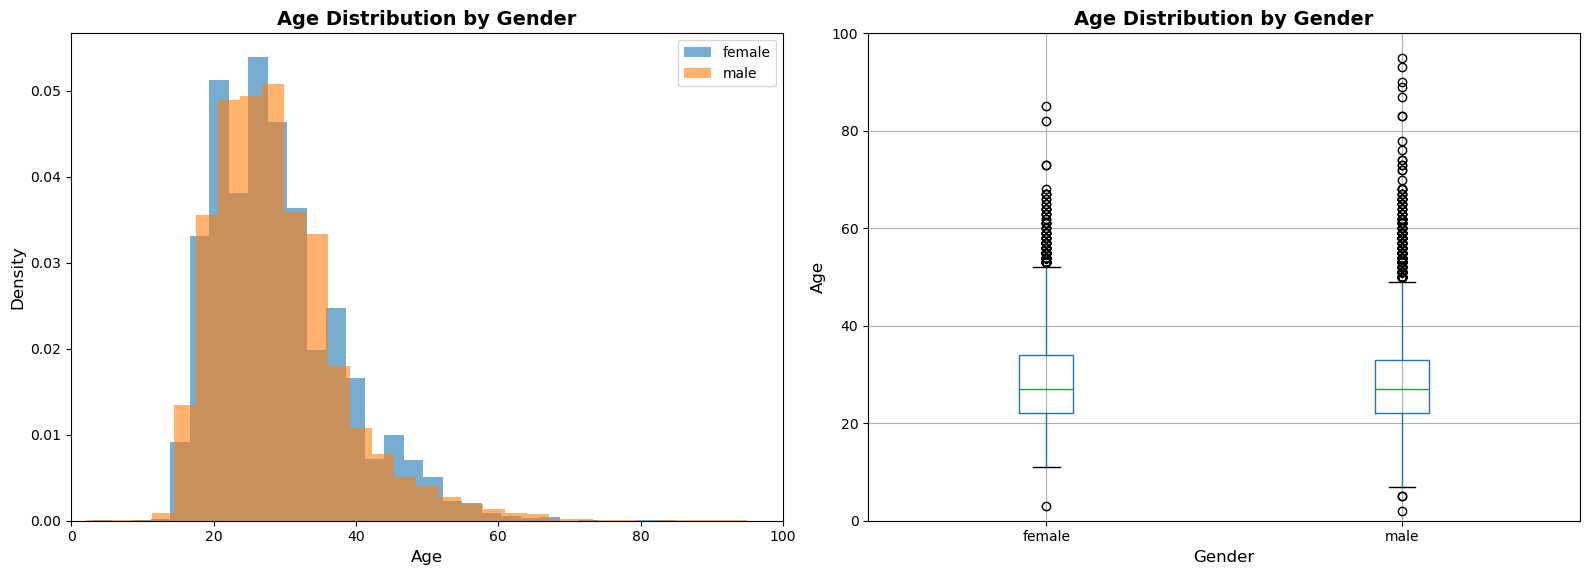

In [114]:
# not much difference

df_age_gender = df_members[['bd', 'gender']].dropna()
df_age_gender = df_age_gender[df_age_gender['gender'].isin(['male', 'female'])]

# get reasonable ages (0-100)
df_age_gender = df_age_gender[(df_age_gender['bd'] >= 1) & (df_age_gender['bd'] <= 100)]

age_by_gender = df_age_gender.groupby('gender')['bd'].agg(['mean', 'median', 'std', 'count'])
print("\nAge Statistics by Gender:")
print(age_by_gender)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for gender in df_age_gender['gender'].unique():
    data = df_age_gender[df_age_gender['gender'] == gender]['bd']
    axes[0].hist(data, bins=30, alpha=0.6, label=gender, density=True)

axes[0].set_title('Age Distribution by Gender', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].legend()
axes[0].set_xlim(0, 100)

df_age_gender.boxplot(column='bd', by='gender', ax=axes[1])
axes[1].set_title('Age Distribution by Gender', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Gender', fontsize=12)
axes[1].set_ylabel('Age', fontsize=12)
axes[1].set_ylim(0, 100)

plt.suptitle('')
plt.tight_layout()
plt.show()

### Membership duration


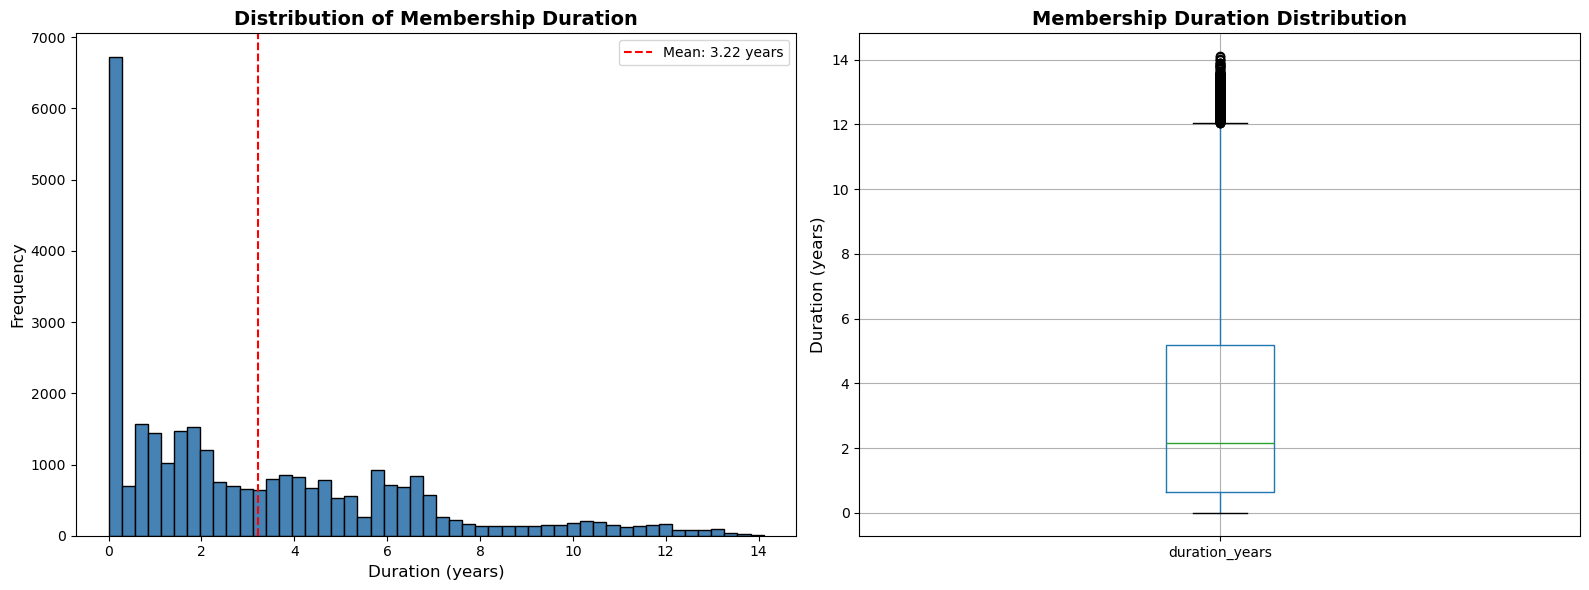

In [115]:
# another slightly interesting one

df_membership = df_members[['registration_init_time', 'expiration_date']].dropna().copy()

# convert to datetime
df_membership['reg_date'] = pd.to_datetime(df_membership['registration_init_time'], format='%Y%m%d', errors='coerce')
df_membership['exp_date'] = pd.to_datetime(df_membership['expiration_date'], format='%Y%m%d', errors='coerce')
df_membership = df_membership.dropna()

# convert to days and years
df_membership['duration_days'] = (df_membership['exp_date'] - df_membership['reg_date']).dt.days
df_membership['duration_years'] = df_membership['duration_days'] / 365

# remove 1970 start dates
df_membership = df_membership[(df_membership['duration_years'] >= 0) & (df_membership['duration_years'] <= 20)]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].hist(df_membership['duration_years'], bins=50, color='steelblue', edgecolor='black')
axes[0].set_title('Distribution of Membership Duration', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Duration (years)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].axvline(df_membership['duration_years'].mean(), color='red', 
                linestyle='--', label=f'Mean: {df_membership["duration_years"].mean():.2f} years')
axes[0].legend()

df_membership.boxplot(column='duration_years', ax=axes[1])
axes[1].set_title('Membership Duration Distribution', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Duration (years)', fontsize=12)

plt.tight_layout()
plt.show()


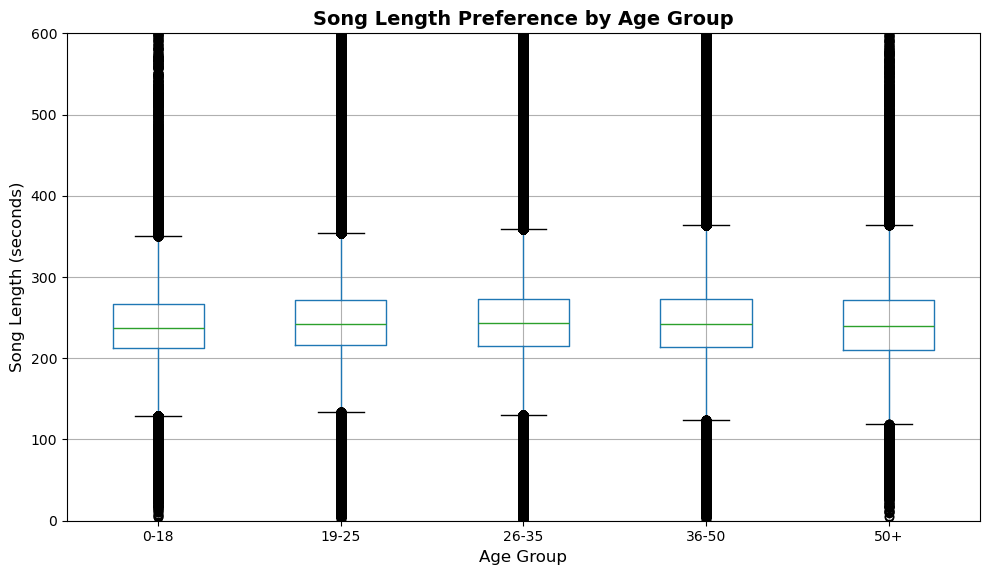

In [116]:
# age vs song length preference
# no preference!

df_age_length = df_train[['msno', 'song_id']].merge(
    df_members[['msno', 'bd']],
    on='msno',
    how='inner'
).merge(
    df_songs[['song_id', 'song_length']],
    on='song_id',
    how='inner'
)

df_age_length = df_age_length.dropna()
df_age_length['song_length_sec'] = df_age_length['song_length'] / 1000
df_age_length = df_age_length[(df_age_length['bd'] >= 0) & (df_age_length['bd'] <= 100)]

df_age_length['age_group'] = pd.cut(df_age_length['bd'], 
                                     bins=[0, 18, 25, 35, 50, 100], 
                                     labels=['0-18', '19-25', '26-35', '36-50', '50+'])

fig, axes = plt.subplots(figsize=(10, 6))

df_age_length.boxplot(column='song_length_sec', by='age_group', ax=axes)
axes.set_title('Song Length Preference by Age Group', fontsize=14, fontweight='bold')
axes.set_xlabel('Age Group', fontsize=12)
axes.set_ylabel('Song Length (seconds)', fontsize=12)
axes.set_ylim(0, 600)

plt.suptitle('')
plt.tight_layout()
plt.show()

### Correlation for Songs

Kinda reportable? Shows that there's no correlation basically :)

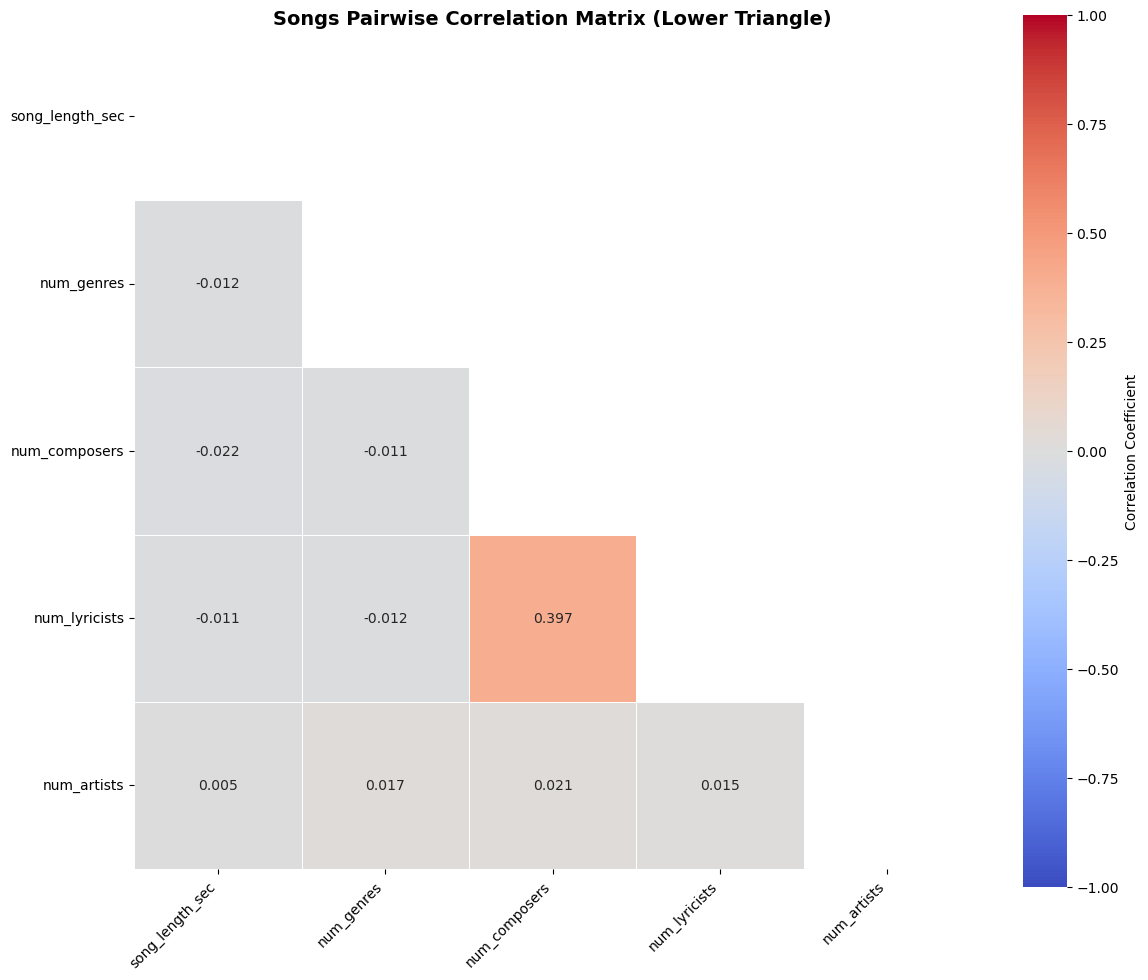

In [117]:
df_songs_corr = df_songs.copy()

# song length (convert to seconds)
df_songs_corr['song_length_sec'] = df_songs_corr['song_length'] / 1000

# number of genres
df_songs_corr['num_genres'] = df_songs_corr['genre_ids'].astype(str).str.split('|').str.len()
df_songs_corr.loc[df_songs_corr['genre_ids'].isna(), 'num_genres'] = 0

# number of composers
def count_composers(composer_str):
    if pd.isna(composer_str) or composer_str == '':
        return 0
    comp_str = str(composer_str)
    composers = [c.strip() for c in comp_str.replace('|', ',').split(',') if c.strip()]
    return len(composers)

df_songs_corr['num_composers'] = df_songs_corr['composer'].apply(count_composers)

# number of lyricists
def count_lyricists(lyricist_str):
    if pd.isna(lyricist_str) or lyricist_str == '':
        return 0
    lyr_str = str(lyricist_str)
    lyricists = [l.strip() for l in lyr_str.replace('|', ',').split(',') if l.strip()]
    return len(lyricists)

df_songs_corr['num_lyricists'] = df_songs_corr['lyricist'].apply(count_lyricists)

# number of artists
def count_artists(artist_str):
    if pd.isna(artist_str) or artist_str == '':
        return 0
    artist_str = str(artist_str)
    # Count separators
    return artist_str.count('&') + artist_str.count(' feat') + artist_str.count(',') + 1

df_songs_corr['num_artists'] = df_songs_corr['artist_name'].apply(count_artists)

# Select numeric columns for correlation
numeric_cols = [
    'song_length_sec',
    'num_genres',
    'num_composers',
    'num_lyricists',
    'num_artists'
]

df_corr = df_songs_corr[numeric_cols].copy()

df_corr_clean = df_corr.dropna()

correlation_matrix = df_corr_clean.corr()

fig, ax = plt.subplots(figsize=(12, 10))

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # mask upper triangle
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, vmin=-1, vmax=1, square=True, linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'}, ax=ax,
            mask=mask)  # Only show lower triangle
ax.set_title(f'Songs Pairwise Correlation Matrix (Lower Triangle)', 
             fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), ha='right')

plt.tight_layout()
plt.show()

### Member City vs Song Language

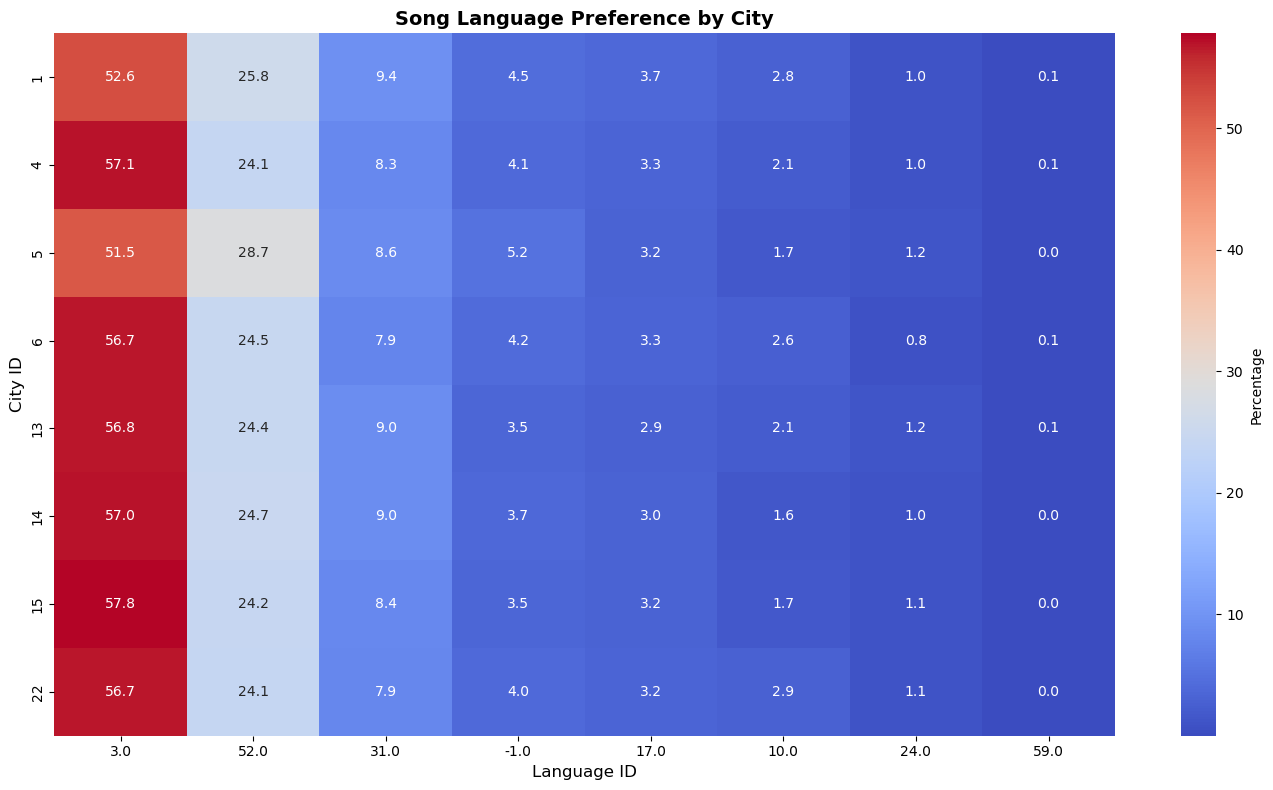

In [118]:
df_city_lang = df_train[['msno', 'song_id']].merge(
    df_members[['msno', 'city']],
    on='msno',
    how='inner'
).merge(
    df_songs[['song_id', 'language']],
    on='song_id',
    how='inner'
)

df_city_lang = df_city_lang.dropna()

top_cities = df_city_lang['city'].value_counts().head(8).index
top_languages = df_city_lang['language'].value_counts().head(8).index

df_city_lang_top = df_city_lang[
    (df_city_lang['city'].isin(top_cities)) & 
    (df_city_lang['language'].isin(top_languages))
]

city_lang_crosstab = pd.crosstab(df_city_lang_top['city'], df_city_lang_top['language'], normalize='index') * 100

city_lang_crosstab = city_lang_crosstab[top_languages]

fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(city_lang_crosstab, annot=True, fmt='.1f', cmap='coolwarm', 
            cbar_kws={'label': 'Percentage'}, ax=ax)
ax.set_title('Song Language Preference by City', fontsize=14, fontweight='bold')
ax.set_xlabel('Language ID', fontsize=12)
ax.set_ylabel('City ID', fontsize=12)
plt.tight_layout()
plt.show()

### Member City vs Artist Country

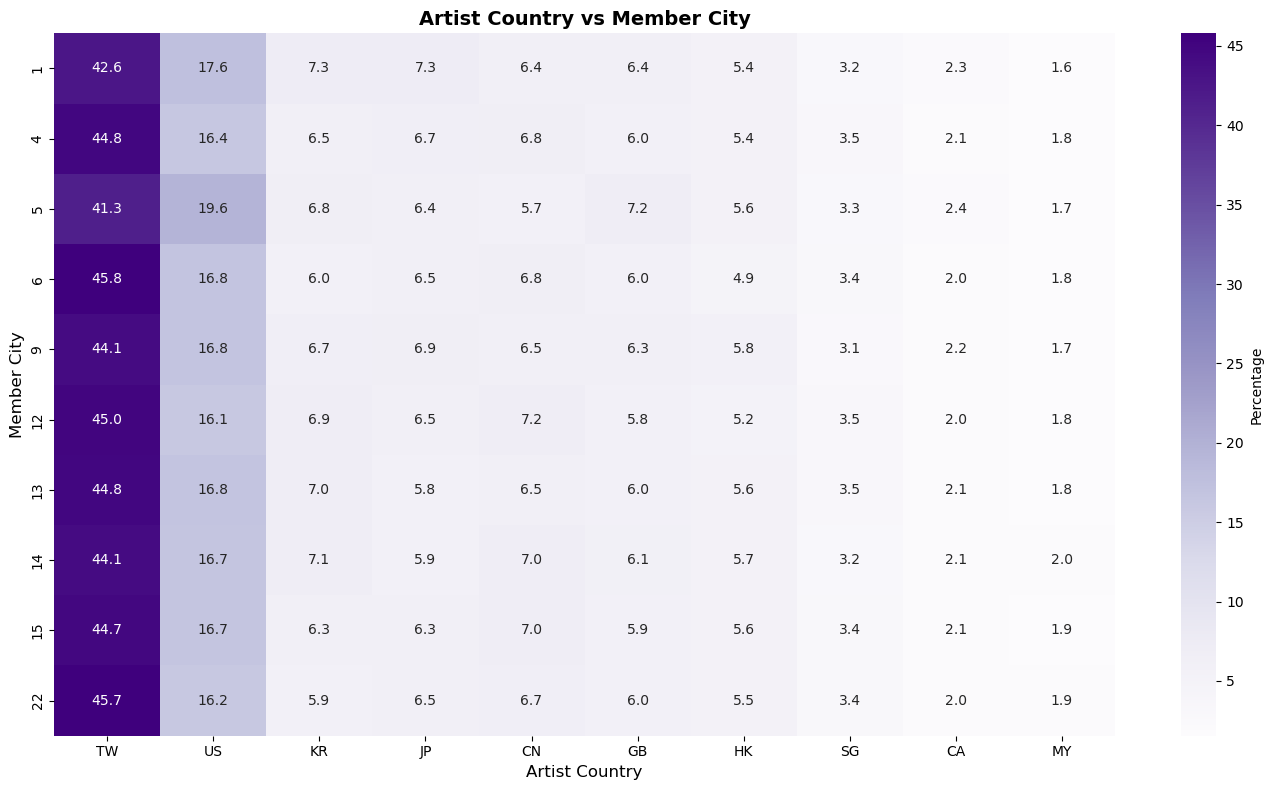

In [119]:
df_country_city = df_train[['msno', 'song_id']].merge(
    df_songs[['song_id', 'artist_name']],
    on='song_id',
    how='inner'
).merge(
    df_artists[['artist_name', 'country']],
    on='artist_name',
    how='left'
).merge(
    df_members[['msno', 'city']],
    on='msno',
    how='inner'
)

df_country_city = df_country_city.dropna(subset=['country', 'city']).copy()

top_countries = df_country_city['country'].value_counts().head(10).index
top_cities = df_country_city['city'].value_counts().head(10).index

df_country_city_top = df_country_city[
    (df_country_city['country'].isin(top_countries)) & 
    (df_country_city['city'].isin(top_cities))
].copy()

country_order = df_country_city['country'].value_counts().head(10).index

fig, ax = plt.subplots(figsize=(14, 8))

country_city_crosstab = pd.crosstab(
    df_country_city_top['city'],
    df_country_city_top['country'],
    normalize='index'
) * 100

country_city_crosstab = country_city_crosstab[country_order]
sns.heatmap(country_city_crosstab, annot=True, fmt='.1f', cmap='Purples', 
            cbar_kws={'label': 'Percentage'}, ax=ax)
ax.set_title('Artist Country vs Member City', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Artist Country', fontsize=12)
ax.set_ylabel('Member City', fontsize=12)

plt.tight_layout()
plt.show()

### Artist Country by Gender

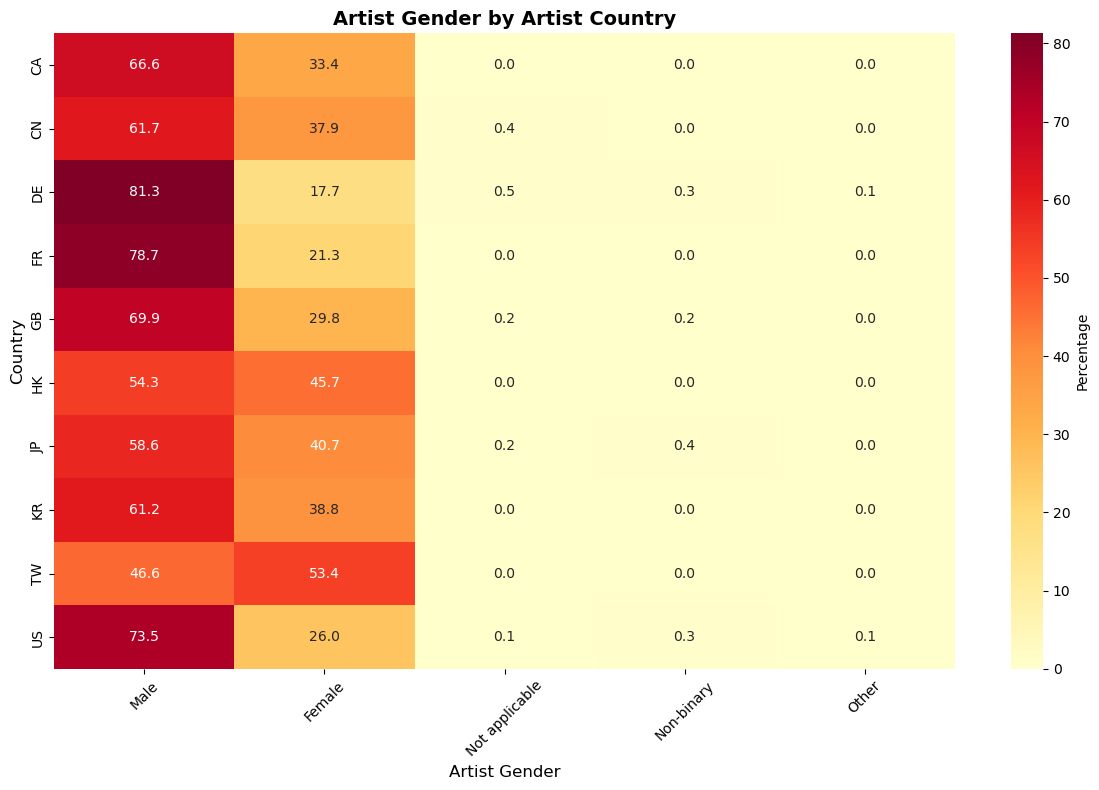

In [125]:
top_countries = df_artists['country'].value_counts().head(10).index

df_artists_top = df_artists[df_artists['country'].isin(top_countries)].copy()

country_gender_crosstab = pd.crosstab(
    df_artists_top['country'],
    df_artists_top['gender'],
    normalize='index'
) * 100

artist_order = df_artists['gender'].value_counts().index
country_gender_crosstab = country_gender_crosstab[artist_order]

fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(country_gender_crosstab, annot=True, fmt='.1f', cmap='YlOrRd', 
            cbar_kws={'label': 'Percentage'}, ax=ax)
ax.set_title('Artist Gender by Artist Country', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Artist Gender', fontsize=12)
ax.set_ylabel('Country', fontsize=12)
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Target Variable Distribution

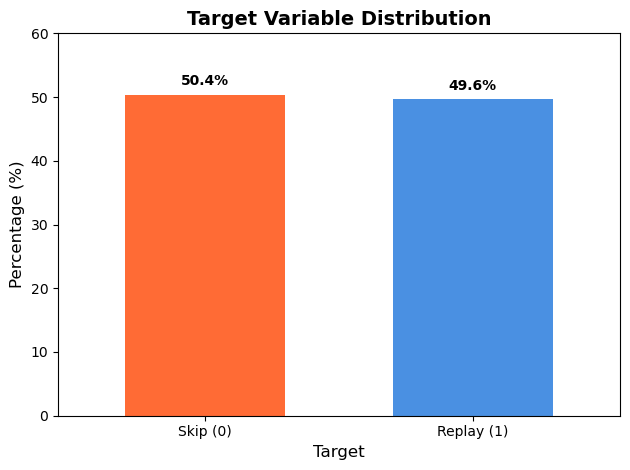

In [129]:
target_counts = df_train['target'].value_counts()
target_pct = (target_counts / target_counts.sum() * 100)

colors = ['#FF6B35', '#4A90E2']
ax = target_pct.plot(kind='bar', color=colors, width=0.6)
plt.title('Target Variable Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Target', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks([0, 1], ['Skip (0)', 'Replay (1)'], rotation=0)
plt.ylim(0, 60)

# Add percentage labels on bars
for i, (target, pct) in enumerate(target_pct.items()):
    ax.text(i, pct + 1, f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### Unique Listeners per Artist

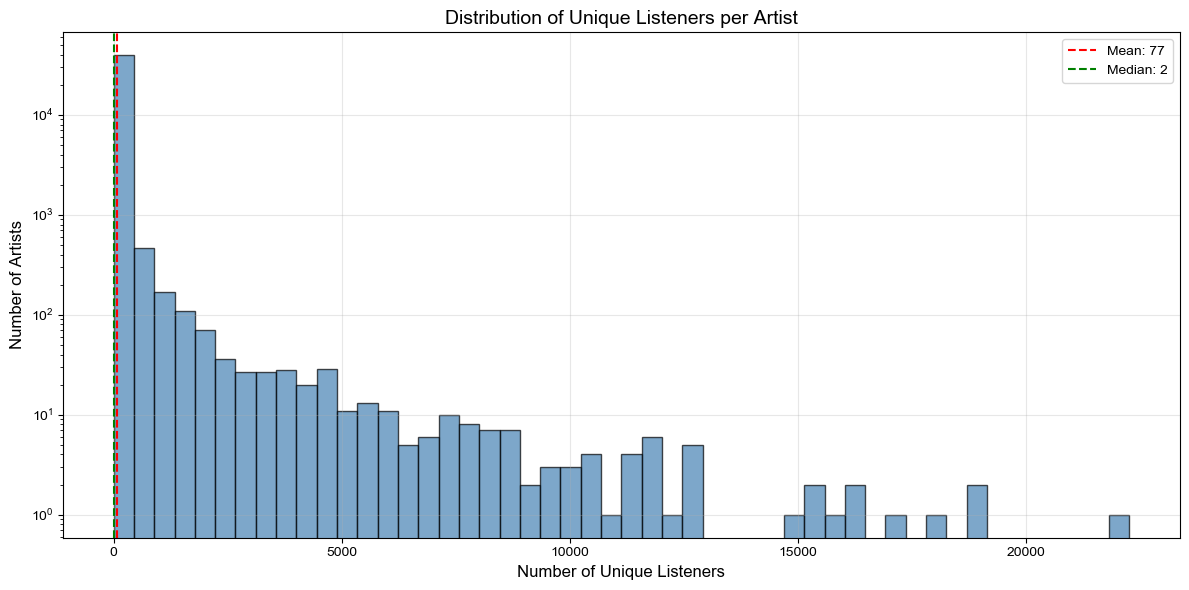

In [141]:
df_artist_listeners = df_train[['msno', 'song_id']].merge(
    df_songs[['song_id', 'artist_name']],
    on='song_id',
    how='inner'
)

artist_listeners = df_artist_listeners.groupby('artist_name')['msno'].nunique()

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(artist_listeners, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax.set_title('Distribution of Unique Listeners per Artist', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Unique Listeners', fontsize=12)
ax.set_ylabel('Number of Artists', fontsize=12)
ax.set_yscale('log')
ax.grid(alpha=0.3)

ax.axvline(artist_listeners.mean(), color='red', linestyle='--', 
           label=f'Mean: {artist_listeners.mean():.0f}')
ax.axvline(artist_listeners.median(), color='green', linestyle='--', 
           label=f'Median: {artist_listeners.median():.0f}')
ax.legend()

plt.tight_layout()
plt.show()

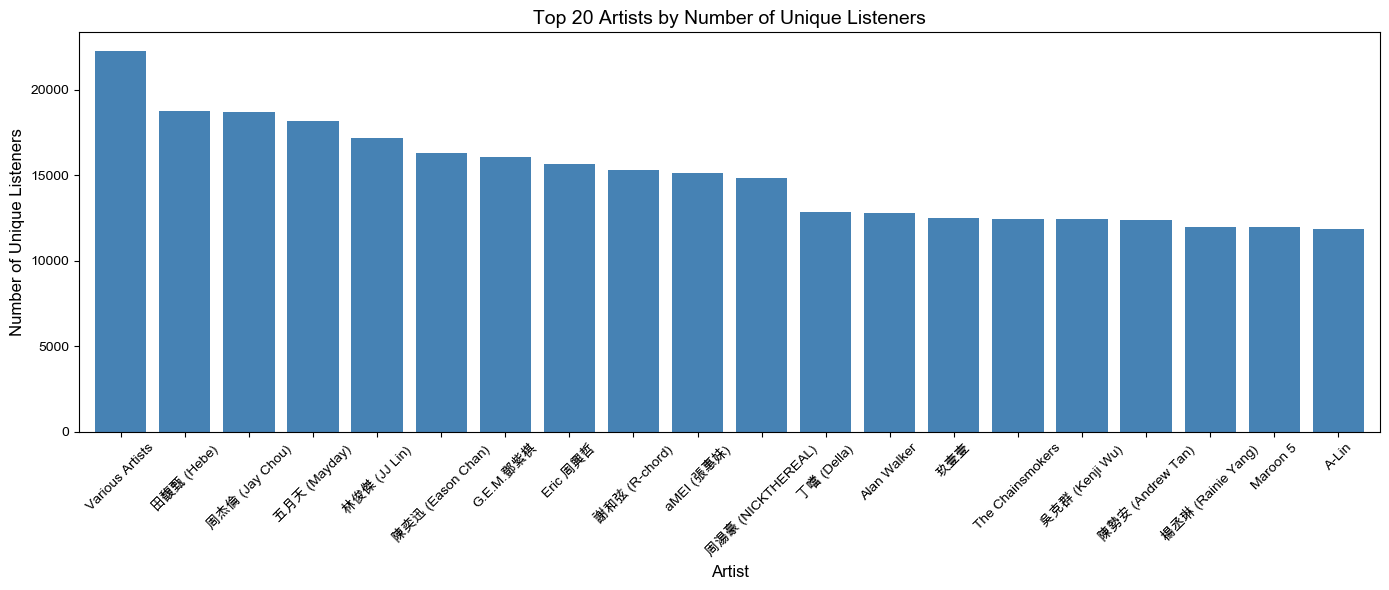

In [139]:

# set chinese font
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

artist_listeners = df_artist_listeners.groupby('artist_name')['msno'].nunique().sort_values(ascending=False)
top_artists = artist_listeners.head(20)

fig, ax = plt.subplots(figsize=(14, 6))
top_artists.plot(kind='bar', ax=ax, color='steelblue', width=0.8)
ax.set_title('Top 20 Artists by Number of Unique Listeners', fontsize=14, fontweight='bold')
ax.set_xlabel('Artist', fontsize=12)
ax.set_ylabel('Number of Unique Listeners', fontsize=12)
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()